<a href="https://colab.research.google.com/github/flohmannjr/tensorflow_curso/blob/main/TensorFlow_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Convolutional Neural Networks

In [ ]:
import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import zipfile
import os
import pathlib
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam

## Setup

In [ ]:
# Ajustes MatPlotLib
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100
plt.style.use('seaborn-darkgrid')

# Determinando um seed
seed = 2008193

### Funções

In [ ]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it 
    to (img_shape, img_shape, colour_channels).
    """

    # Read in the image
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor
    img = tf.image.decode_image(img)

    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img/255.

    return img

def pred_and_plot(model, filename, class_names):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title.
    """

    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    if len(pred[0]) > 1: # Multi-class
        pred_class = class_names[pred.argmax()]
        pred_perc = pred.max()
    else: # Binary
        pred_class = class_names[int(tf.round(pred))]
        pred_perc = tf.squeeze(pred if pred >= 0.5 else 1 - pred)

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class} ({(pred_perc * 100):0.2f}%)")
    plt.axis(False)
    plt.show()

## Dados para os primeiros testes

Dados modificados da base Food 101: https://www.kaggle.com/datasets/dansbecker/food-101

Fonte da base modificada: https://github.com/mrdbourke/tensorflow-deep-learning#course-materials

03 TensorFlow Computer Vision: pizza_steak

In [ ]:
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# zip_ps = zipfile.ZipFile('pizza_steak.zip')
# zip_ps.extractall()
# zip_ps.close()

### Verificando os dados

In [ ]:
# for caminho, diretorios, arquivos in os.walk('pizza_steak'):
#     print(f"Há {len(diretorios)} diretórios e {len(arquivos)} imagens em '{caminho}'.")

# print(len(os.listdir('pizza_steak/train/pizza')))

In [ ]:
# # Definindo rótulos pelos nomes dos diretórios

# diretorio = pathlib.Path('pizza_steak/train')
# rotulos = np.array(sorted([item.name for item in diretorio.glob('*')]))

# # rotulos

#### Amostra

In [ ]:
# def visualizar_imagem_aleatoria(raiz, rotulo):
#     diretorio = raiz + '/' + rotulo

#     caminho_imagem = random.sample(os.listdir(diretorio), 1)

#     imagem = mpimg.imread(diretorio + '/' + caminho_imagem[0])

#     plt.imshow(imagem)
#     plt.title(f"[{rotulo}] {caminho_imagem[0]}")
#     plt.axis(False)
#     plt.show()

#     print(f"Dimensões: {imagem.shape}")

#     return imagem

In [ ]:
# imagem = visualizar_imagem_aleatoria('pizza_steak/train', 'pizza')

## Pré-processamento dos dados

In [ ]:
# # Diretórios
# dir_treino = 'pizza_steak/train'
# dir_teste = 'pizza_steak/test'

### Importando dados e tranformando em lotes

In [ ]:
# tf.random.set_seed(seed)

# # Criando geradores de pré-processamento
# dg_treino = ImageDataGenerator(rescale=1./255)
# dg_teste = ImageDataGenerator(rescale=1./255)

# dados_treino = dg_treino.flow_from_directory(directory=dir_treino,
#                                              batch_size=32,
#                                              target_size=(224, 224),
#                                              class_mode='binary',
#                                              seed=seed)

# dados_teste = dg_teste.flow_from_directory(directory=dir_teste,
#                                            batch_size=32,
#                                            target_size=(224, 224),
#                                            class_mode='binary',
#                                            seed=seed)

## Primeiro modelo convulacional (Tiny VGG)

In [ ]:
# tf.random.set_seed(seed)

# cnn = tf.keras.Sequential()

# # Primeiro bloco convulacional, com formato de entrada (input_shape) e borda (padding)
# cnn.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)))
# cnn.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'))

# # Segundo bloco convulacional
# cnn.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
# cnn.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(2))

# # Camadas de finalização
# cnn.add(tf.keras.layers.Flatten())
# cnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# cnn.compile(loss='binary_crossentropy',
#             optimizer='Adam',
#             metrics=['accuracy'])

# # Utilize GPU para acelerar (muito) o processamento
# hist_cnn = cnn.fit(dados_treino,
#                    epochs=10,
#                    steps_per_epoch=len(dados_treino),
#                    validation_data=dados_teste,
#                    validation_steps=len(dados_teste),
#                    verbose=1)

# cnn.evaluate(dados_teste)

In [ ]:
# sns.lineplot(data=hist_cnn.history['loss'], label='Perda no treinamento')
# sns.lineplot(data=hist_cnn.history['accuracy'], label='Precisão no treinamento')

# sns.lineplot(data=hist_cnn.history['val_loss'], label='Perda na validação')
# sns.lineplot(data=hist_cnn.history['val_accuracy'], label='Precisão na validação')

# plt.title('Histórico de perda e precisão por iteração')
# plt.xlabel('Iteração')
# plt.ylabel('Perda / Precisão')

# plt.ylim(0, 1.1)

# plt.legend(frameon=True, facecolor='white');

CNN Explainer https://poloclub.github.io/cnn-explainer/

## Testando modelo não-convulacional

In [ ]:
# tf.random.set_seed(seed)

# ncnn = tf.keras.Sequential()

# ncnn.add(tf.keras.layers.Flatten(input_shape=(224, 224, 3)))
# ncnn.add(tf.keras.layers.Dense(10, activation='relu'))
# ncnn.add(tf.keras.layers.Dense(10, activation='relu'))
# ncnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# ncnn.compile(loss='binary_crossentropy',
#              optimizer='Adam',
#              metrics=['accuracy'])

# hist_ncnn = ncnn.fit(dados_treino,
#                      epochs=10,
#                      steps_per_epoch=len(dados_treino),
#                      verbose=1)

In [ ]:
# sns.lineplot(data=hist_ncnn.history['loss'], label='Perda')
# sns.lineplot(data=hist_ncnn.history['accuracy'], label='Precisão')

# plt.title('Histórico de perda e precisão por iteração')
# plt.xlabel('Iteração')
# plt.ylabel('Perda / Precisão')

# plt.ylim(0, 1.1)

# plt.legend(frameon=True, facecolor='white');

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

In [ ]:
# # visualize, visualize, visualize
# imagem_pizza = visualizar_imagem_aleatoria('pizza_steak/train', 'pizza')

### 2. Preprocess the data

In [ ]:
# # Define directory dataset paths
# dir_treino = 'pizza_steak/train'

In [ ]:
# # Create train and test data generators and rescale the data
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# dg_treino = ImageDataGenerator(rescale=1./255)  # 255 é o valor máximo em bytes de uma cor em um canal (0-255). O resultado são dados escalonados de 0 a 1.

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896?s=20 

In [ ]:
# Load in our image data from directories and turn them into batches
# dados_treino = dg_treino.flow_from_directory(directory=dir_treino,    # Diretório das imagens
#                                              batch_size=32,           # Tamanho do minilote de imagens
#                                              target_size=(224, 224),  # Tamanho-alvo da imagens
#                                              class_mode='binary',     # Tipo de dado de saída (rótulo)
#                                              seed=seed)

In [ ]:
# # How many batches are there?
# len(dados_treino)  # Quantidade de imagens / tamanho do lote (1500 / 32 = 46.875)

### 3. Create a model

In [ ]:
# # Create the model (this will be our baseline, a layer convolutional neural network)

# tf.keras.layers.Conv2D(filters=10,                 # Quantidade de janelas (kernels) para verificar a imagem. Equivalente à quantidade de neurônios de uma camada densa.
#                        kernel_size=3,              # Tamanho da janela de verificação. O mesmo que (3, 3), por ser quadrada.
#                        strides=1,                  # Quantidade de pixels transpostos por vez. O mesmo que (1, 1), por ser quadrado.
#                        padding='valid',            # 'valid' = acrescenta uma "borda" vazia à imagem. 'same' = mesmo formato da entrada, se strides=1.
#                        activation='relu',          # 
#                        input_shape=(224, 224, 3))  # 

Explicações mais detalhadas: https://poloclub.github.io/cnn-explainer/

### 4. Fit the model

In [ ]:
# # Fit the model

# hist_cnn = cnn.fit(dados_treino,
#                    epochs=10,                          # Quantidade de iterações
#                    steps_per_epoch=len(dados_treino),  # Quantidade de passos por iteração
#                    validation_data=dados_teste,        # Dados para validação
#                    validation_steps=len(dados_teste),  # Quantidade de passos por validação
#                    verbose=1)

### 5. Evaluating our model

In [ ]:
# cnn.evaluate(dados_teste)

# sns.lineplot(data=hist_cnn.history['loss'], label='Perda no treinamento')
# sns.lineplot(data=hist_cnn.history['accuracy'], label='Precisão no treinamento')

# sns.lineplot(data=hist_cnn.history['val_loss'], label='Perda na validação')
# sns.lineplot(data=hist_cnn.history['val_accuracy'], label='Precisão na validação')

When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be diminished.

Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), **when there are large differences your model may be overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

Reducing overfitting is also known as **regularization**.

In [ ]:
# tf.keras.layers.MaxPool2D(pool_size=2)

pool_size define o tamanho do bloco que será compactado.

2 = (2, 2) = 4 pixels que serão convertidos em **1 pixel contendo o valor máximo** entre os pixels do bloco.

#### Opening our bag of tricks and finding data augmentation

In [ ]:
# # Create ImageDataGenerator training instance with data augmentation

# dg_treino_original = ImageDataGenerator(rescale=1./255)

# dg_treino_expandido = ImageDataGenerator(rescale=1./255,          # 255 é o valor máximo em bytes de uma cor em um canal (0-255). O resultado são dados escalonados de 0 a 1.
#                                          rotation_range=0.2,      # Alcance para rotações aleatórias
#                                          shear_range=0.2,         # Intensidade da poda
#                                          zoom_range=0.2,          # Alcance do zoom aleatório
#                                         #  width_shift_range=0.2,   # Alcance do movimento horizontal (fração da largura total, se < 1, ou quantidade de pixels, se >= 1)
#                                         #  height_shift_range=0.2,  # Alcance do movimento vertical (mesmo que acima)
#                                          horizontal_flip=True)    # Inverter entradas horizontalmente de maneira aleatória

# dg_teste_original = ImageDataGenerator(rescale=1./255)

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjuting the rotation of an image, flipping it, cropping it or something similar.

In [ ]:
# # Dados de treino originais

# dados_treino_originais = dg_treino_original.flow_from_directory(directory=dir_treino,
#                                                                 batch_size=32,
#                                                                 target_size=(224, 224),
#                                                                 class_mode='binary',
#                                                                 seed=seed)

# # Dados de treino expandidos

# dados_treino_expandidos = dg_treino_expandido.flow_from_directory(directory=dir_treino,
#                                                                   batch_size=32,
#                                                                   target_size=(224, 224),
#                                                                   class_mode='binary',
#                                                                   seed=seed)

# # Dados de teste originais

# dados_teste_originais = dg_teste_original.flow_from_directory(directory=dir_teste,
#                                                               batch_size=32,
#                                                               target_size=(224, 224),
#                                                               class_mode='binary',
#                                                               seed=seed)

##### Visualização

In [ ]:
# # Get sample data batches
# imagens_originais, rotulos_originais = dados_treino_originais.next()
# imagens_expandidas, rotulos_expandidos = dados_treino_expandidos.next()

In [ ]:
# # Show original image and augmented image

# indice_aleatorio = random.randint(0, 32) # O lote tem 32 imagens.

# plt.imshow(imagens_originais[indice_aleatorio])
# plt.title(f"Original")
# plt.axis(False)
# plt.show()

# plt.imshow(imagens_expandidas[indice_aleatorio])
# plt.title(f"Expandida")
# plt.axis(False)
# plt.show();

#### Modelo com dados expandidos

In [ ]:
# tf.random.set_seed(seed)

# cnne = tf.keras.Sequential()

# cnne.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)))
# cnne.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
# cnne.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'))

# cnne.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
# cnne.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
# cnne.add(tf.keras.layers.MaxPool2D(2))

# cnne.add(tf.keras.layers.Flatten())
# cnne.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# cnne.compile(loss='binary_crossentropy',
#              optimizer='Adam',
#              metrics=['accuracy'])

# hist_cnne = cnne.fit(dados_treino_expandidos,
#                      epochs=10,
#                      steps_per_epoch=len(dados_treino_expandidos),
#                      validation_data=dados_teste_originais,
#                      validation_steps=len(dados_teste_originais),
#                      verbose=1)

# cnne.evaluate(dados_teste_originais)

In [ ]:
# sns.lineplot(data=hist_cnne.history['loss'], label='Perda no treinamento')
# sns.lineplot(data=hist_cnne.history['accuracy'], label='Precisão no treinamento')

# sns.lineplot(data=hist_cnne.history['val_loss'], label='Perda na validação')
# sns.lineplot(data=hist_cnne.history['val_accuracy'], label='Precisão na validação')

# plt.title('Histórico de perda e precisão por iteração')
# plt.xlabel('Iteração')
# plt.ylabel('Perda / Precisão')

# plt.ylim(0, 1.1)

# plt.legend(frameon=True, facecolor='white');

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate 
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

#### Verificar a melhor taxa de aprendizado

In [ ]:
# tf.random.set_seed(seed)

# cnnlr = tf.keras.Sequential()

# cnnlr.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)))
# cnnlr.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
# cnnlr.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'))

# cnnlr.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
# cnnlr.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
# cnnlr.add(tf.keras.layers.MaxPool2D(2))

# cnnlr.add(tf.keras.layers.Flatten())
# cnnlr.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# cnnlr.compile(loss='binary_crossentropy',
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=['accuracy'])

# lrs = tf.keras.callbacks.LearningRateScheduler(lambda epoch: tf.multiply(0.001, tf.pow(10, tf.divide(epoch, 20))))

# hist_cnnlr = cnnlr.fit(dados_treino_expandidos,
#                        epochs=40,
#                        steps_per_epoch=len(dados_treino_expandidos),
#                        callbacks=[lrs],
#                        verbose=1)

# cnnlr.evaluate(dados_teste_originais)

In [ ]:
# sns.lineplot(x=hist_cnnlr.history['lr'], y=hist_cnnlr.history['loss'], label='Perda')
# sns.lineplot(x=hist_cnnlr.history['lr'], y=hist_cnnlr.history['accuracy'], label='Precisão')

# plt.xscale('log')

# plt.title('Histórico de perda e precisão por taxa de aprendizado')
# plt.xlabel('Iteração')
# plt.ylabel('Perda / Precisão')

# plt.ylim(0, 1.1)

# plt.legend(frameon=True, facecolor='white');

#### Modelo aperfeiçoado

In [ ]:
# tf.random.set_seed(seed)

# cnnf = tf.keras.Sequential()

# cnnf.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)))
# cnnf.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'))

# cnnf.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
# cnnf.add(tf.keras.layers.MaxPool2D(2))

# cnnf.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
# cnnf.add(tf.keras.layers.MaxPool2D(2))

# cnnf.add(tf.keras.layers.Conv2D(10, 3, activation='relu'))
# cnnf.add(tf.keras.layers.MaxPool2D(2))

# cnnf.add(tf.keras.layers.Flatten())
# cnnf.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# cnnf.compile(loss='binary_crossentropy',
#              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#              metrics=['accuracy'])

# hist_cnnf = cnnf.fit(dados_treino_expandidos,
#                      epochs=10,
#                      steps_per_epoch=len(dados_treino_expandidos),
#                      validation_data=dados_teste_originais,
#                      validation_steps=len(dados_teste_originais),
#                      verbose=1)

# cnnf.evaluate(dados_teste_originais)

In [ ]:
# sns.lineplot(data=hist_cnnf.history['loss'], label='Perda no treinamento')
# sns.lineplot(data=hist_cnnf.history['accuracy'], label='Precisão no treinamento')

# sns.lineplot(data=hist_cnnf.history['val_loss'], label='Perda na validação')
# sns.lineplot(data=hist_cnnf.history['val_accuracy'], label='Precisão na validação')

# plt.title('Histórico de perda e precisão por iteração')
# plt.xlabel('Iteração')
# plt.ylabel('Perda / Precisão')

# plt.legend(frameon=True, facecolor='white');

## Usando modelo aperfeiçoado para fazer previsões com novos dados (novas imagens)

In [ ]:
# novos_dados = ['https://www.alegretetudo.com.br/wp-content/uploads/2022/12/alegretetudo-piero-pizza-napoletana-uma-referencia-na-gastronomia-alegretense-piero-1.jpg',
#                'https://p2.trrsf.com/image/fget/cf/774/0/images.terra.com/2022/06/02/279611433_1059421814647523_54491555537251263_n-s4p4togqup9g.jpg',
#                'https://www.thedailymeal.com/img/gallery/the-best-flour-choice-for-a-homemade-neapolitan-pizza/l-intro-1673454821.jpg',
#                'https://imageproxy.wolt.com/venue/6385a050b8f220e130ecd428/2369d9c8-81d3-11ed-9275-9259623c4ddd_p1016240.jpg',
#                'https://duisktnou8b89.cloudfront.net/img/items/linha-economypizzas-grandes-8-pedacos6266efced8f32.jpg',
#                'https://doordash-static.s3.amazonaws.com/media/store/header/e677ff3e-fe3e-4478-839d-543ce9f9f832.jpg',
#                'https://natashaskitchen.com/wp-content/uploads/2020/03/Pan-Seared-Steak-4.jpg',
#                'https://cdn.apartmenttherapy.info/image/upload/f_jpg,q_auto:eco,c_fill,g_auto,w_1500,ar_4:3/k%2Farchive%2F2816f86937ebc7019a513d858cec8e0c55d38890',
#                'https://www.cookingclassy.com/wp-content/uploads/2022/07/grilled-steak-15.jpg',
#                'https://img.hellofresh.com/f_auto,fl_lossy,q_auto,w_1200/hellofresh_s3/image/6243263a18a51738954a3a82-044a399e.jpg',
#                'https://ichef.bbci.co.uk/food/ic/food_16x9_832/recipes/rib-eye_steak_with_61963_16x9.jpg',
#                'https://whitneybond.com/wp-content/uploads/2021/06/steak-marinade-13.jpg']

In [ ]:
# !wget '{random.choice(novos_dados)}' -O nova_imagem.jpg
# pred_and_plot(cnnf, 'nova_imagem.jpg', rotulos)

## Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust differet hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Become one with the data

In [ ]:
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# zip_fc = zipfile.ZipFile('10_food_classes_all_data.zip')
# zip_fc.extractall()
# zip_fc.close()

--2023-01-21 14:13:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  85.1MB/s    in 5.4s    

2023-01-21 14:13:59 (91.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# for caminho, diretorios, arquivos in os.walk('10_food_classes_all_data'):
#     print(f"Há {len(diretorios)} diretórios e {len(arquivos)} imagens em '{caminho}'.")

In [ ]:
# dir_treino = '10_food_classes_all_data/train'
# dir_teste = '10_food_classes_all_data/test'

In [ ]:
# diretorio = pathlib.Path(dir_treino)
# rotulos = np.array(sorted([item.name for item in diretorio.glob('*')]))

# # rotulos

In [ ]:
# imagem = visualizar_imagem_aleatoria(dir_treino, random.choice(rotulos))

### 2. Preprocess the data

In [ ]:
# # dg_treino = ImageDataGenerator(rescale=1./255)

# # dados_treino = dg_treino.flow_from_directory(directory=dir_treino,
# #                                              batch_size=32,
# #                                              target_size=(224, 224),
# #                                              class_mode='categorical',
# #                                              seed=seed)

# dg_teste = ImageDataGenerator(rescale=1./255)

# dados_teste = dg_teste.flow_from_directory(directory=dir_teste,
#                                            batch_size=32,
#                                            target_size=(224, 224),
#                                            class_mode='categorical',
#                                            seed=seed)

Found 2500 images belonging to 10 classes.


### 3. Create a model

In [ ]:
# cnnm = Sequential()

# cnnm.add(Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)))
# cnnm.add(Conv2D(10, 3, activation='relu'))
# cnnm.add(MaxPool2D(2, padding='valid'))

# cnnm.add(Conv2D(10, 3, activation='relu'))
# cnnm.add(Conv2D(10, 3, activation='relu'))
# cnnm.add(MaxPool2D(2))

# cnnm.add(Flatten())
# cnnm.add(Dense(len(rotulos), activation='softmax'))

# cnnm.compile(loss='categorical_crossentropy',
#              optimizer=Adam(),
#              metrics=['accuracy'])

### 4. Fit the model

In [ ]:
# hist_cnnm = cnnm.fit(dados_treino,
#                      epochs=5,
#                      steps_per_epoch=len(dados_treino),
#                      validation_data=dados_teste,
#                      validation_steps=len(dados_teste),
#                      verbose=1)

### 5. Evaluate the model

In [ ]:
# cnnm.evaluate(dados_teste)

In [ ]:
# sns.lineplot(data=hist_cnnm.history['loss'], label='Perda no treinamento')
# sns.lineplot(data=hist_cnnm.history['accuracy'], label='Precisão no treinamento')

# sns.lineplot(data=hist_cnnm.history['val_loss'], label='Perda na validação')
# sns.lineplot(data=hist_cnnm.history['val_accuracy'], label='Precisão na validação')

# plt.title('Histórico de perda e precisão por iteração')
# plt.xlabel('Iteração')
# plt.ylabel('Perda / Precisão')

# plt.legend(frameon=True, facecolor='white');

### 6. Adjust differet hyperparameters and improve the model

#### Expandir dados

In [ ]:
# dg_treino_expandido = ImageDataGenerator(rescale=1./255,
#                                          rotation_range=0.2,
#                                          shear_range=0.2,
#                                          zoom_range=0.2,
#                                          horizontal_flip=True)

# dados_treino_expandidos = dg_treino_expandido.flow_from_directory(directory=dir_treino,
#                                                                   batch_size=32,
#                                                                   target_size=(224, 224),
#                                                                   class_mode='categorical',
#                                                                   seed=seed)

Found 7500 images belonging to 10 classes.


#### Modelo expandido

In [ ]:
# cnnme = Sequential()

# cnnme.add(Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)))
# cnnme.add(MaxPool2D(2, padding='valid'))

# cnnme.add(Conv2D(10, 3, activation='relu'))
# cnnme.add(MaxPool2D(2))

# cnnme.add(Conv2D(10, 3, activation='relu'))
# cnnme.add(MaxPool2D(2))

# cnnme.add(Conv2D(10, 3, activation='relu'))
# cnnme.add(MaxPool2D(2))

# cnnme.add(Flatten())
# cnnme.add(Dense(len(rotulos), activation='softmax'))

# cnnme.compile(loss='categorical_crossentropy',
#               optimizer=Adam(learning_rate=0.001),
#               metrics=['accuracy'])

# hist_cnnme = cnnme.fit(dados_treino_expandidos,
#                        epochs=15,
#                        steps_per_epoch=len(dados_treino_expandidos),
#                        validation_data=dados_teste,
#                        validation_steps=len(dados_teste),
#                        verbose=1)

Epoch 1/15
235/235 [==============================] - 339s 1s/step - loss: 2.1699 - accuracy: 0.2015 - val_loss: 2.0017 - val_accuracy: 0.2936
Epoch 2/15
235/235 [==============================] - 340s 1s/step - loss: 1.9905 - accuracy: 0.2947 - val_loss: 1.9131 - val_accuracy: 0.3232
Epoch 3/15
235/235 [==============================] - 338s 1s/step - loss: 1.9328 - accuracy: 0.3187 - val_loss: 1.8745 - val_accuracy: 0.3388
Epoch 4/15
235/235 [==============================] - 336s 1s/step - loss: 1.8976 - accuracy: 0.3337 - val_loss: 1.8615 - val_accuracy: 0.3360
Epoch 5/15
235/235 [==============================] - 336s 1s/step - loss: 1.8438 - accuracy: 0.3600 - val_loss: 1.8513 - val_accuracy: 0.3424
Epoch 6/15
235/235 [==============================] - 342s 1s/step - loss: 1.8166 - accuracy: 0.3783 - val_loss: 1.7715 - val_accuracy: 0.3880
Epoch 7/15
235/235 [==============================] - 335s 1s/step - loss: 1.7906 - accuracy: 0.3805 - val_loss: 1.7656 - val_accuracy: 0.3920

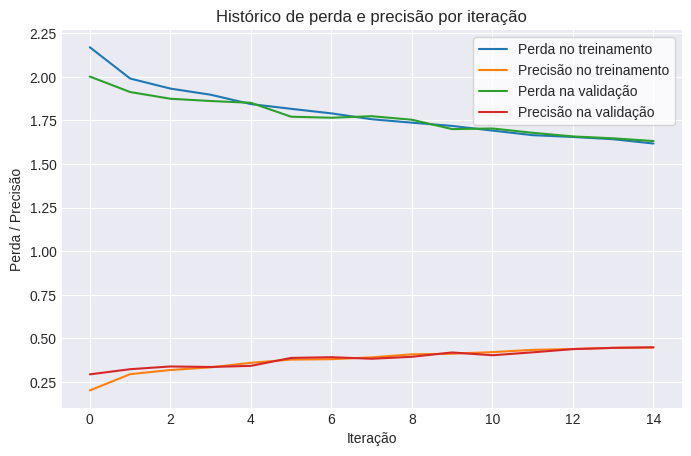

In [ ]:
# sns.lineplot(data=hist_cnnme.history['loss'], label='Perda no treinamento')
# sns.lineplot(data=hist_cnnme.history['accuracy'], label='Precisão no treinamento')

# sns.lineplot(data=hist_cnnme.history['val_loss'], label='Perda na validação')
# sns.lineplot(data=hist_cnnme.history['val_accuracy'], label='Precisão na validação')

# plt.title('Histórico de perda e precisão por iteração')
# plt.xlabel('Iteração')
# plt.ylabel('Perda / Precisão')

# plt.legend(frameon=True, facecolor='white');

## Salvar o modelo

In [ ]:
# Formato HDF5
# cnnme.save('modelo_cnnme_HDF5.h5')

## Novos dados (novas imagens)

### Carregar modelo

In [ ]:
cnnme = tf.keras.models.load_model('modelo_cnnme_HDF5.h5')

rotulos = np.array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'])

### Testar modelo

In [ ]:
novos_dados = ['https://www.alegretetudo.com.br/wp-content/uploads/2022/12/alegretetudo-piero-pizza-napoletana-uma-referencia-na-gastronomia-alegretense-piero-1.jpg',
               'https://www.thedailymeal.com/img/gallery/the-best-flour-choice-for-a-homemade-neapolitan-pizza/l-intro-1673454821.jpg',
               'https://doordash-static.s3.amazonaws.com/media/store/header/e677ff3e-fe3e-4478-839d-543ce9f9f832.jpg',
               'https://natashaskitchen.com/wp-content/uploads/2020/03/Pan-Seared-Steak-4.jpg',
               'https://img.hellofresh.com/f_auto,fl_lossy,q_auto,w_1200/hellofresh_s3/image/6243263a18a51738954a3a82-044a399e.jpg',
               'https://whitneybond.com/wp-content/uploads/2021/06/steak-marinade-13.jpg',
               'https://www.cookingclassy.com/wp-content/uploads/2018/08/chicken-curry-11.jpg',
               'https://www.licious.in/blog/wp-content/uploads/2020/12/Chicken-Curry-recipe.jpg',
               'https://savvybites.co.uk/wp-content/uploads/2020/10/Coconut-Chicken-Curry-4-of-5.jpg',
               'https://www.seriouseats.com/thmb/zNzv_FjRF4hEbpawVKJDC-JU0g8=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/the-best-buffalo-wings-oven-fried-wings-recipe-hero-dcc412b6e26444b4a2112d4402f039ae.JPG',
               'https://mccormick.widen.net/content/n0phdkxdlp/jpeg/Franks_RedHot_Buffalo_Chicken_Wings.jpg',
               'https://www.foodandwine.com/thmb/YqtSpajmztyHG1tWz3VlGj6MT_o=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/Buffalo-Wings-Recipe-FT-BLOG1222-26e07fdb9aec4afe8d4bc39ea331c753.jpg',
               'https://www.allrecipes.com/thmb/WAaJX7ghFAiGjU3WGRmRC424exA=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/6751001-egg-fried-rice-Mariya-Tkachenko-4x3-1-0a5504e18cea49c2bf4419799bd50ad9.jpg',
               'https://www.indianhealthyrecipes.com/wp-content/uploads/2020/12/fried-rice.jpg',
               'https://images.squarespace-cdn.com/content/v1/5ed666a6924cd0017d343b01/1593466464958-HD61RC4NOR0G4Q6FIP7W/bite-me-more-apple-vegetable-fried-rice-recipe.jpg',
               'https://www.acouplecooks.com/wp-content/uploads/2020/05/Grilled-Salmon-015-1.jpg',
               'https://hips.hearstapps.com/hmg-prod/images/how-to-grill-salmon-recipe1-1655870645.jpg',
               'https://images-gmi-pmc.edge-generalmills.com/7f4554ba-8c3b-483f-ab26-7e2235343c73.jpg',
               'https://assets.epicurious.com/photos/57c5c6d9cf9e9ad43de2d96e/1:1/w_2560%2Cc_limit/the-ultimate-hamburger.jpg',
               'https://assets.biggreenegg.eu/app/uploads/2019/03/28145521/topimage-classic-hamburger-2019m04-800x534-600x401.jpg',
               'https://www.thecountrycook.net/wp-content/uploads/2011/03/thumbnail-Homemade-Freddys-Steakburger-Cheeseburgers-scaled.jpg',
               'https://upload.wikimedia.org/wikipedia/commons/d/da/Strawberry_ice_cream_cone_%285076899310%29.jpg',
               'https://img.etimg.com/thumb/width-1200,height-900,imgsize-381352,resizemode-1,msid-84939728/magazines/panache/from-the-us-russia-to-india-an-ice-cream-bowl-has-a-long-political-history.jpg',
               'https://i.pinimg.com/originals/97/15/62/971562a8ea05473cb1d3daa5e4b85b6d.jpg',
               'https://www.pacificfoods.com/wp-content/uploads/2022/08/SP_Recipes_0002_Ramen.jpg',
               'https://hips.hearstapps.com/hmg-prod/images/190208-delish-ramen-horizontal-093-1550096715.jpg',
               'https://i0.wp.com/seonkyounglongest.com/wp-content/uploads/2018/04/shoyu-ramen-1.jpg',
               'https://t1.uc.ltmcdn.com/pt/posts/2/0/3/como_fazer_sushi_delicioso_10302_orig.jpg',
               'https://xtudoreceitas.com/wp-content/uploads/Sushi.jpg',
               'https://cdn.britannica.com/52/128652-050-14AD19CA/Maki-zushi.jpg']

In [ ]:
# !wget '{random.choice(novos_dados)}' -O nova_imagem.jpg
# pred_and_plot(cnnme, 'nova_imagem.jpg', rotulos)

In [ ]:
for nd in novos_dados:
    !wget '{nd}' -O nova_imagem.jpg
    pred_and_plot(cnnme, 'nova_imagem.jpg', rotulos)